# Custom Datasets

In [2]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get data

Data is a subset of Food-101 (3 classes and only 10% of images).

In [3]:
import requests
import zipfile
from pathlib import Path

# setup path to a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# if image folder doesn't exist, download and prepare it
if image_path.is_dir():
  print(f"{image_path} directory already exists, skipping download")
else:
  print(f"{image_path} doesn't exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download dataset
with open(data_path / "pizza_stak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak and sushi data...")
  f.write(request.content)
  print("Writing contents to pizza_stak_sushi.zip")

# unzip data
with zipfile.ZipFile(data_path / "pizza_stak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak and sushi data to image path")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists, skipping download
Writing contents to pizza_stak_sushi.zip
Unzipping pizza, steak and sushi data to image path


## 2. Data preparation and exploration

In [4]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path, returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [6]:
# setup train and test paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualizing an image
1. Get all image paths
2. Pick a random image path
3. Get image class name using `pathlib.Path.parent.stem`
4. Open the image with Python's Pillow (PIL)
5. Show image and print metadata

Random image path: data/pizza_steak_sushi/test/pizza/2236338.jpg
Image clas: pizza
Image height: 512
Image width: 512


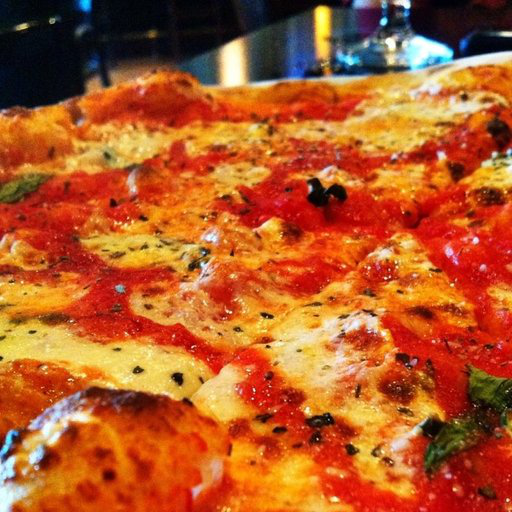

In [7]:
import random
from PIL import Image

random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image clas: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

#### Matplotlib

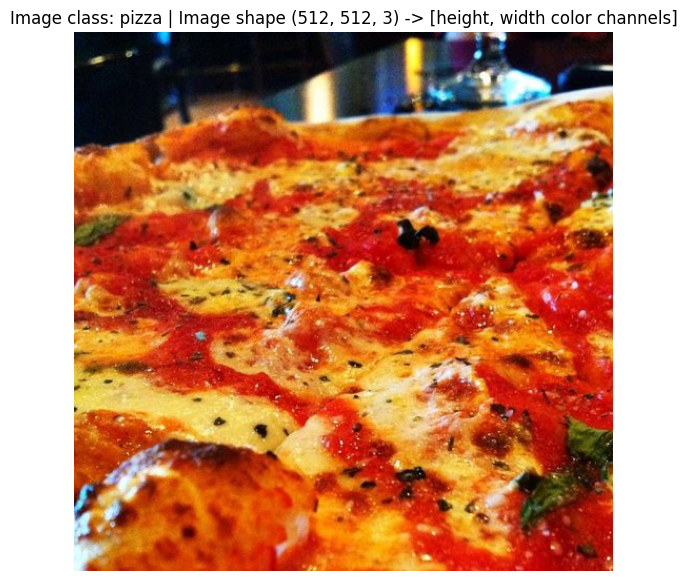

In [8]:
import numpy as np 
import matplotlib.pyplot as plt

# turn image into array
img_as_array = np.asarray(img)

# plot the img with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape {img_as_array.shape} -> [height, width color channels]")
plt.axis(False);


In [9]:
img_as_array

array([[[  7,  18,  38],
        [  5,  16,  34],
        [  2,  13,  31],
        ...,
        [ 18,   7,  11],
        [ 12,   6,   8],
        [  8,   4,   5]],

       [[  2,  13,  33],
        [  2,  13,  31],
        [  2,  13,  31],
        ...,
        [ 18,   9,  10],
        [ 17,  11,  13],
        [ 16,  12,  13]],

       [[  0,  11,  31],
        [  1,  12,  30],
        [  3,  14,  32],
        ...,
        [ 17,   8,   9],
        [ 16,  10,  12],
        [ 15,  11,  12]],

       ...,

       [[226, 249, 255],
        [229, 253, 255],
        [229, 255, 254],
        ...,
        [250, 149,  95],
        [240, 139,  83],
        [234, 130,  75]],

       [[220, 247, 254],
        [224, 252, 255],
        [226, 255, 253],
        ...,
        [236, 133,  88],
        [195,  88,  42],
        [170,  62,  16]],

       [[218, 247, 255],
        [223, 252, 255],
        [224, 254, 254],
        ...,
        [255, 157, 116],
        [208,  99,  60],
        [166,  52,  15]]

## 3. Transforming data

Before we can use image data with PyTorch:
1. Turn your target data into tensors (in our case: numerical representation of images)
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DataLoader`, call these `Dataset` and `Dataloader`
3. 

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

In [11]:
# tranform for an image
data_transform = transforms.Compose([
  # Resize images to 64x64
  transforms.Resize(size=(64, 64)),

  # Flip the images randomly on the horizontal axis
  transforms.RandomHorizontalFlip(p=0.5),

  # Turn the image into a torch tensor
  transforms.ToTensor()
])

In [12]:
data_transform(img).shape, data_transform(img).dtype

(torch.Size([3, 64, 64]), torch.float32)

### 3.2 Visualizing transformed images

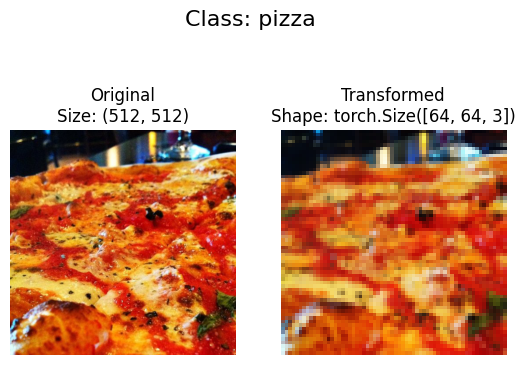

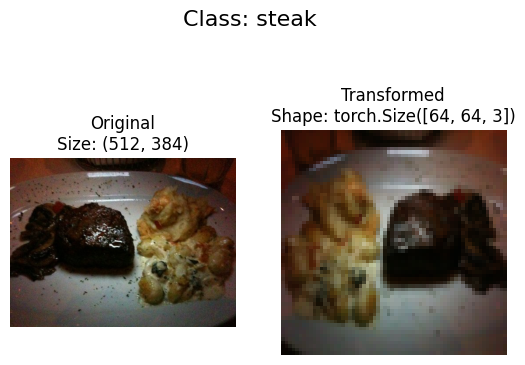

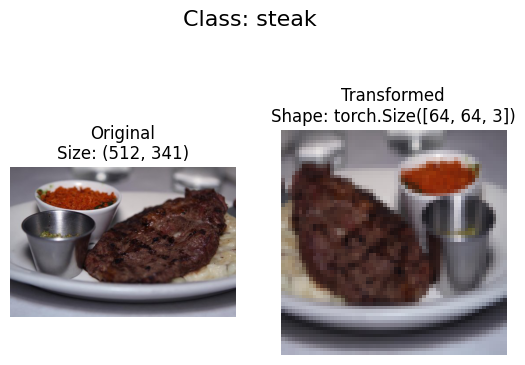

In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
  """
  Selects random images from a path of images and transforms them, then plots
  the originals and tranformed versions.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0) # make color channels first -> last
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=42)

### 4. Option 1: Loading image data using `ImageFolder`


In [14]:
# use imagefolder to create a dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None) # Transforms for data and target
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform) # defualt is None
train_data, test_data 

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [15]:
# get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
# get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# index on train dataset to get a single image and a label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image dataype: {img.dtype}")
print(f"Image label: {class_names[label]}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

torch.Size([3, 64, 64]) torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

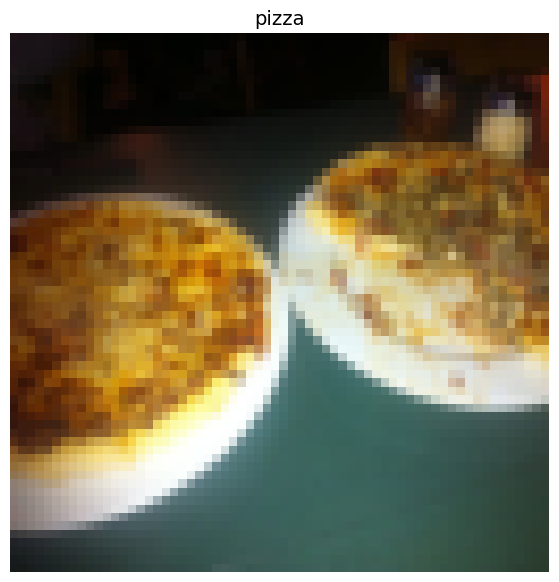

In [18]:
# rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

print(img.shape, img_permute.shape)

# plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14)

### 4.1 Turn loaded images into `DataLoader`

A `DataLoader` is going to help us turn our `Dataset`s into iterables and we can customize the batch size so our model can see `batch_size` number of images at a time

In [19]:
import os
print(f"Number of CPUs: {os.cpu_count()}")
from torch.utils.data import DataLoader

BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                           batch_size=BATCH_SIZE,
                           num_workers=os.cpu_count(),
                           shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)
train_dataloader, test_dataloader

Number of CPUs: 10


(<torch.utils.data.dataloader.DataLoader at 0x7fb92889b430>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb92889b340>)

In [20]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [21]:
img, label = next(iter(train_dataloader))

# batch size will now be 1, can be changed
print(f"Image shape: {img.shape} -> [batch size, color channels, height, width]")
print(f"Label shape: {label.shape}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [22]:
print(f"Image shape: {img.shape} -> [batch size, color channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch size, color channels, height, width]
Label shape: torch.Size([1])


## 5. Option 2: Loading data with a custom `Dataset`
1. Be able to load images from file
2. Be able to get class names from Dataset
3. Be able to get classes as dictionary from Dataset

In [23]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

# instance of ImageFolder
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Helper function to get class names
1. Get class names using `os.scanddir()` to traverse a target directory ideally in standard image classification format
2. Raise an error if the class names aren't found
3. Turn the class names into a dict and list and return them

In [24]:
# setup path for target directory
target_dir = train_dir
print(f"Target directory: {target_dir}")

# get class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found

Target directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [26]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory"""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}")
  
  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx
  


In [27]:
find_classes(target_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom Dataset to replicate ImageFolder

1. Subclass torch.utils.data.Dataset
2. Init our cubclass with a target directory as well as a transform if we want to transform the data
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform for the data
  * classes - a list of the target classes
  * class_to_idx - dict of the target classes mapped to integer labels
4. Create a function to load_images, this function will open an image
5. Overwrite the __len()__ method to return the length of our dataset
6. Overwrite the __getitem()__ method to return a given sample when passed an index

In [28]:
# write a custom dataset class
from torch.utils.data import Dataset

# 1. subclass Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize
  def __init__(self, targ_dir: str, transform=None):
    # 3. Create class attributes
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # setup transform
    self.transform = transform
    # create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)
    
  # 4. Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    "Opens an image via a path and returns it."
    image_path = self.paths[index]
    return Image.open(image_path)
  
  # 5. Overwrite len
  def __len__(self) -> int:
    "Returns the total number of samples."
    return len(self.paths)
  
  # 6. Overwrite to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transform if necessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx
    

In [29]:
# create a tranform
import torchvision.transforms
train_transforms = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor()
])

test_transforms = transforms.Compose([
  transforms.Resize(size=(64, 64)),
  transforms.ToTensor
])

train_data_custom = ImageFolderCustom(targ_dir=target_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=target_dir, transform=test_transforms)

train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7fb8f9b0df00>,
 <__main__.ImageFolderCustom at 0x7fb8f9b0ed40>)

In [30]:
len(train_data), len(train_data_custom)

(225, 225)

In [32]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.3 Function to display random images

1. Take in a Dataset and a number of other parameters such as class names and number of images to visualize
2. Cap images at 10
3. Set the random seed
4. Get a list of random sample indices from the target dataset
5. Matplotlib plot
6. Loop through random sample images and plot them
7. Make sure dimensions line up with MPL (HWC)

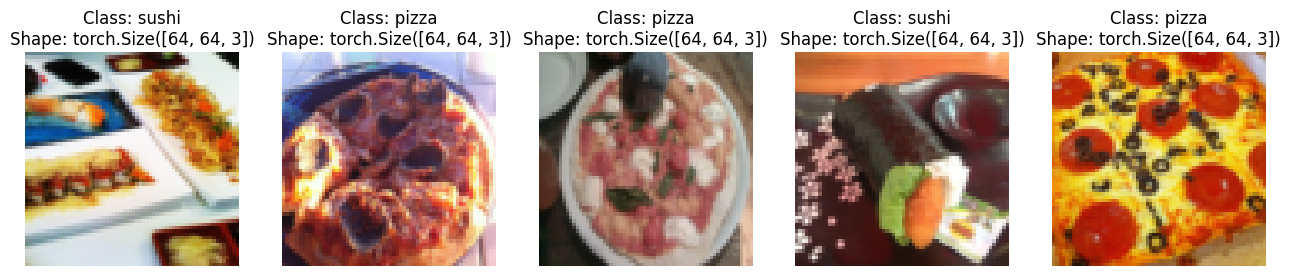

In [35]:
# 1. Creat a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int=10,
                          display_shape: bool = True,
                          seed: int = None):
  # 2. Cap at 10 images
  if n < 0 or n > 10:
    n = 10

  # 3. set seed
  if seed:
    random.seed(seed)

  # 4. Get random indices
  random_samples_idx = random.sample(range(len(dataset)), k=n)
  
  # 5. Plot
  plt.figure(figsize=(16, 8))

  # 6. Loop through random indices and plot them
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1, 2, 0) # CHW -> HWC

    # Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    plt.axis(False)
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape: {targ_image_adjust.shape}"
    plt.title(title)

display_random_images(train_data, n=5, classes=class_names, seed=42)

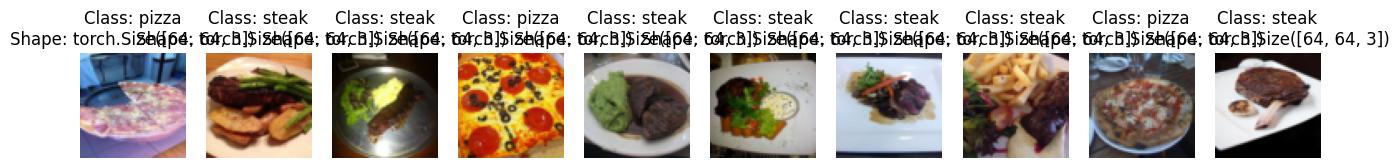

In [37]:
# Display random images from the custom dataset
display_random_images(train_data_custom, n=10, classes=class_names, seed=42)

In [38]:
### 5.4 Turn custom loaded images into DataLoaders

In [39]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=False)
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7fb91900b670>,
 <torch.utils.data.dataloader.DataLoader at 0x7fb91900b610>)

In [41]:
# get image and label from custom dataloader
img_custom, label_custom = next(iter(train_data_custom))
img_custom.shape

torch.Size([3, 64, 64])

## 6. Data augmentation